In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/damida/bigcontest_ensemble/preprocessing/bigcontest.csv")
df= data.copy() #원본 둔 채 copydata 생성

In [28]:
cthall = df[ df['place'] == '콘서트홀' ]
cthall # concerthall 에서 한 공연만 가지고 dataframe 생성

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [29]:
cthall_unique = cthall[ (cthall['ticket_cancel']==2) | (cthall['price']==0) ]

In [31]:
cthall = cthall[cthall['ticket_cancel']==0]
cthall.shape

(864120, 24)

In [32]:
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,0,일반,1528,NaN,20190413.0,클래식,콘서트홀,100,15,N
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.0,오페라,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,...,0,초대권,2253,20190519.0,20190519.0,클래식,콘서트홀,120,15,N
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [51]:
# cthall = cthall[ cthall['price'] !=0 ]
# cthall.shape

In [52]:
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,0,일반,1528,NaN,20190413.0,클래식,콘서트홀,100,15,N
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.0,오페라,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,...,0,초대권,2253,20190519.0,20190519.0,클래식,콘서트홀,120,15,N
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [33]:
#공연시작시간cthall['time'] = 'morning'
cthall['time'] = 'morning'
cthall.loc[cthall['tran_time']>=1200,'time'] = 'afternoon'
cthall.loc[cthall['tran_time']>=1800,'time'] = 'evening'

In [34]:
cthall['floor'] = cthall['seat'].str.split(' ').str[0]
cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
cthall['col'] = cthall['seat'].str.split(' ').str[1].str[3:]

In [35]:
# discount_type 전처리
#새로운 column
# - column명 : discount
# - %앞의 숫자 : %앞의 수
# - 2+1 : -21
# - 결츨값 : -10
cthall['discount'] = cthall['discount_type'].str.extract('([0-9]+)\%')

cthall.loc[(~cthall['discount_type'].str.contains('%')) & (cthall['discount_type'].str.contains('특별할인')) & \
           (~(cthall['discount_type'].str.contains('기획사'))),'discount'] = -21

cthall['discount'] = cthall['discount'].fillna('-10')

In [36]:
# discount를 사용하여 원가격복구
# - discount가 숫자
#   - 역수를 사용하여 원가격으로 복구
# - discount가 투플원
#   - 기존가격의 2/3 
cthall[cthall['discount']==-21][['performance_code','discount','price']].sort_values(['performance_code','price'])

,performance_code,discount,price
84003,1283,-21,25000
104192,1283,-21,25000
263957,1283,-21,25000
733908,1283,-21,25000
818118,1283,-21,25000
1014441,1283,-21,25000
1328036,1283,-21,25000
1544147,1283,-21,25000
1546098,1283,-21,25000
1705943,1283,-21,25000


In [37]:
#discoount 정수형으로 변경
cthall['discount'].astype(int)

4         -10
6         -10
7         -10
9         -10
11         20
           ..
1920852   -10
1920855   -10
1920856   -10
1920858   -10
1920864    30
Name: discount, Length: 864120, dtype: int32

In [38]:
# 원가격 복구를 위한 함수
from fractions import Fraction # 분수 표현식
import numpy as np
def ori_price(df):
    if df["discount"] == -10:
        return df['price']
    elif df["discount"] == -21:
        return df['price'] * float(Fraction(2, 3))
    else:
        return df['price'] *np.reciprocal(1-(int(df["discount"])/100))

In [39]:
#원가격복구
cthall['ori_price'] = cthall.apply(ori_price , axis=1)

In [16]:
cthall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864120 entries, 4 to 1920864
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                289698 non-null  float64
 1   gender             290011 non-null  object 
 2   membership_type_1  290011 non-null  object 
 3   membership_type_2  224112 non-null  object 
 4   membership_type_3  73416 non-null   object 
 5   membership_type_4  11865 non-null   object 
 6   membership_type_5  540 non-null     object 
 7   membership_type_6  0 non-null       float64
 8   tran_date          864120 non-null  int64  
 9   tran_time          864120 non-null  int64  
 10  play_date          864120 non-null  int64  
 11  play_st_time       864120 non-null  int64  
 12  seat               864120 non-null  object 
 13  price              864120 non-null  int64  
 14  ticket_cancel      864120 non-null  int64  
 15  discount_type      864120 non-null  object 
 16  perfor

In [41]:
# datediff 생성
cthall['tran_date'] = pd.to_datetime(cthall['tran_date'],format='%Y%m%d')
cthall['pre_open_date'] = pd.to_datetime(cthall['pre_open_date'],format='%Y%m%d')
cthall['open_date'] = pd.to_datetime(cthall['open_date'],format='%Y%m%d')

def date_chage(df):
    if df['pre_open_date']:
        return df['tran_date'] - df['pre_open_date']
    else:
        return df['tran_date'] - df['open_date']


cthall['date_diff'] = cthall.apply(date_chage,axis=1)

cthall['date_diff'] = cthall['date_diff'].dt.days
cthall['date_diff']
# cthall['date_diff'] = cthall['tran_date'] - cthall['pre_open_date']
# cthall['date_diff'].fillna( (cthall['tran_date'] - cthall['open_date'] ), inplace=True )

4          28.0
6           NaN
7          11.0
9           NaN
11          NaN
           ... 
1920852   -16.0
1920855    17.0
1920856     NaN
1920858     7.0
1920864     NaN
Name: date_diff, Length: 864120, dtype: float64

In [18]:
cthall['date_diff'].unique()


array([  28.,   nan,   11.,    6.,   38.,    0.,    5.,   -6.,   30.,
         20.,   17.,  126.,   56.,   49.,   14.,   12.,    3.,   51.,
         33.,   35.,    2.,   50.,   19.,    9.,   26.,    1.,   25.,
         47.,   22.,   64.,   58.,   16.,   27.,  100.,   31.,   39.,
         85.,   45.,   21.,   24.,   23.,   60.,   52.,   55.,   29.,
         34.,   40.,   18.,   71.,   42.,    7.,   57.,  -11.,   84.,
         93.,  -16.,   75.,   48.,   69.,    4.,   80.,   15.,  128.,
         -3.,   70.,   79.,   68.,   74.,   13.,   92.,   32.,    8.,
         59.,   44.,  417.,   36.,   37.,  117.,   -2.,   76.,  194.,
        148.,   41.,   54.,  104.,   10.,  103.,   65.,   91.,   43.,
         46.,   99.,  113.,   -4.,  160.,  -18.,  127.,  208.,   86.,
         98.,   63.,  135.,  175.,   67.,   61.,  112.,  106.,  107.,
         88.,   53.,  118.,   81.,   62.,   -9.,   77.,   90.,  124.,
        102.,  105.,  120.,   -1.,   83.,   78.,   -5.,  153.,  133.,
         82.,  154.,

In [22]:
# 코로나 사회적거리두기기간에 코로나단계 파생변수 생성
# 코로나 사회적거리두기기간 20200322 ~ 20220418
# def sep_social_d(date_a,date_b, level):
#     a = df_covid.query( (" {} <= tran_date <= {} ").format(date_a , date_b) )
#     a['covid_social_sep_level'] = level
#     return a

In [23]:
# def covid_sep(df):
#     if 20200816<= df["tran_date"] <= 20200829 :
#         return 2
#     elif 20200830<= df["tran_date"] <= 20200913:
#         return 2.5
#     elif 20200914<= df["tran_date"] <=20200927 :
#         return 2
#     elif 20201012<= df["tran_date"] <=20201123 :
#         return 1
#     elif 20201124<= df["tran_date"] <=20201207 :
#         return 2
#     elif 20201208<= df["tran_date"] <=20210214 :
#         return 2.5
#     elif 20210215<= df["tran_date"] <=20210614 :
#         return 2
#     elif 20210712<= df["tran_date"] <=20211003 :
#         return 4
#     else:
#         return 0

In [40]:
# cthall['covid_sep'] = cthall.apply(covid_sep, axis=1)

In [63]:
cthall = cthall.drop(['age', 'gender','membership_type_1', 'membership_type_2','membership_type_3',\
                      'membership_type_4','membership_type_5', 'membership_type_6','ticket_cancel',\
                      'discount_type','place', 'play_st_time','intermission', 'discount'], axis=1)
#ticket_cancel과 discount_type은 원데이터 전처리에서 컬럼제거를 할 것인가?

In [64]:
cthall.to_csv("./merge_cutrow.csv")

In [65]:
cthall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864120 entries, 4 to 1920864
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   tran_date         864120 non-null  datetime64[ns]
 1   tran_time         864120 non-null  int64         
 2   play_date         864120 non-null  int64         
 3   seat              864120 non-null  object        
 4   price             864120 non-null  int64         
 5   performance_code  864120 non-null  int64         
 6   pre_open_date     541247 non-null  datetime64[ns]
 7   open_date         864120 non-null  datetime64[ns]
 8   genre             843988 non-null  object        
 9   running_time      864120 non-null  int64         
 10  member_yn         864120 non-null  object        
 11  time              864120 non-null  object        
 12  floor             864120 non-null  object        
 13  zone              864120 non-null  object        
 14  col     

In [66]:
cthall_no_covid = cthall[(cthall['play_date'] > 20220415) | (cthall['play_date'] <= 20200229)]
cthall_covid = cthall[(cthall['play_date'] < 20220415) & (cthall['play_date'] > 20200229)]

In [67]:
cthall_no_covid.to_csv("./cthall_no_covid.csv")
cthall_covid.to_csv("./cthall_covid.csv")

In [68]:
cthall_covid.shape

(181797, 17)

In [69]:
cthall_no_covid.shape

(682323, 17)

---

In [81]:
cthall_second = cthall[ ['play_date','performance_code','genre','running_time','time','date_diff','price','ori_price','covid_sep'] ]
cthall_second['covid_sep_season'] = np.where( cthall['covid_sep'] == 0 , 0, 1)
cthall_second

,play_date,performance_code,genre,running_time,time,date_diff,price,ori_price,covid_sep,covid_sep_season
4,20220302,897,독주,90,afternoon,28.0,180000,163636.363636,0.0,0
6,20191109,44,교향곡,100,afternoon,NaN,0,0.000000,0.0,0
7,20190723,827,교향곡,120,morning,11.0,0,0.000000,0.0,0
9,20190721,1528,클래식,100,morning,NaN,75000,68181.818182,0.0,0
11,20191201,315,오페라,120,afternoon,NaN,24000,30000.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1920852,20190523,2253,클래식,120,afternoon,-16.0,0,0.000000,0.0,0
1920855,20230613,2825,교향곡,120,afternoon,17.0,10000,9090.909091,0.0,0
1920856,20201020,77,클래식,120,afternoon,NaN,0,0.000000,0.0,0
1920858,20200818,850,합창,110,afternoon,7.0,0,0.000000,0.0,0


---

In [95]:
cthall_second = cthall_second.dropna() #결측값 제거

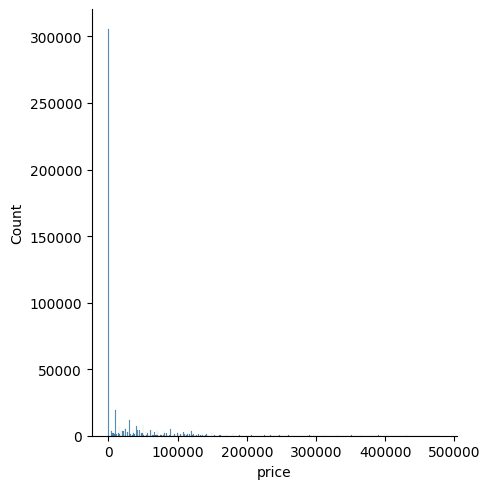

In [45]:
import seaborn as sns
sns.displot(cthall_second['price']) # price 분포확인, 치우침으로 log변환 정규화

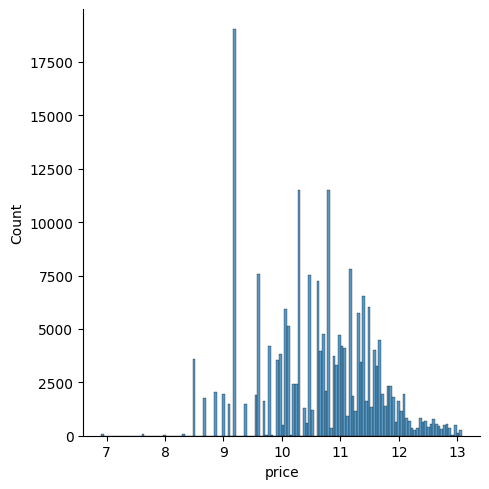

In [46]:
sns.displot(np.log(cthall_second['price']))

<Axes: xlabel='time'>

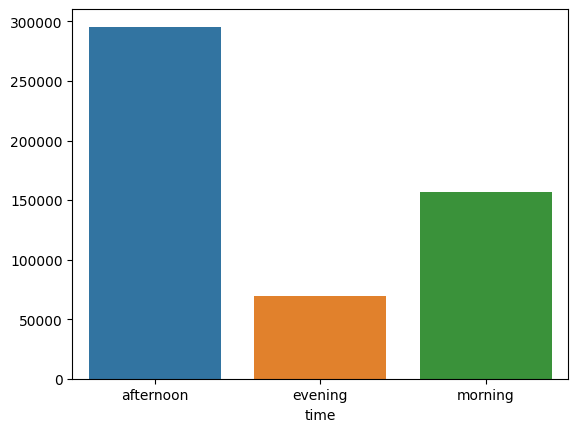

In [47]:
cthall_second_val = cthall_second.groupby('time').count()['performance_code'].values
cthall_second_idx = cthall_second.groupby('time').count()['performance_code'].index

sns.barplot(x= cthall_second_idx , y= cthall_second_val )
# time별 공연 예매 count 오후>오전>저녁 순 예매 count높음

In [51]:
cthall_second.groupby('date_diff').count()

,performance_code,genre,running_time,time,price,ori_price,covid_sep,covid_sep_season
date_diff,,,,,,,,
-345.0,1,1,1,1,1,1,1,1
-337.0,4,4,4,4,4,4,4,4
-336.0,2,2,2,2,2,2,2,2
-310.0,1,1,1,1,1,1,1,1
-302.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
415.0,3,3,3,3,3,3,3,3
416.0,224,224,224,224,224,224,224,224
417.0,248,248,248,248,248,248,248,248


<Axes: xlabel='date_diff', ylabel='price'>

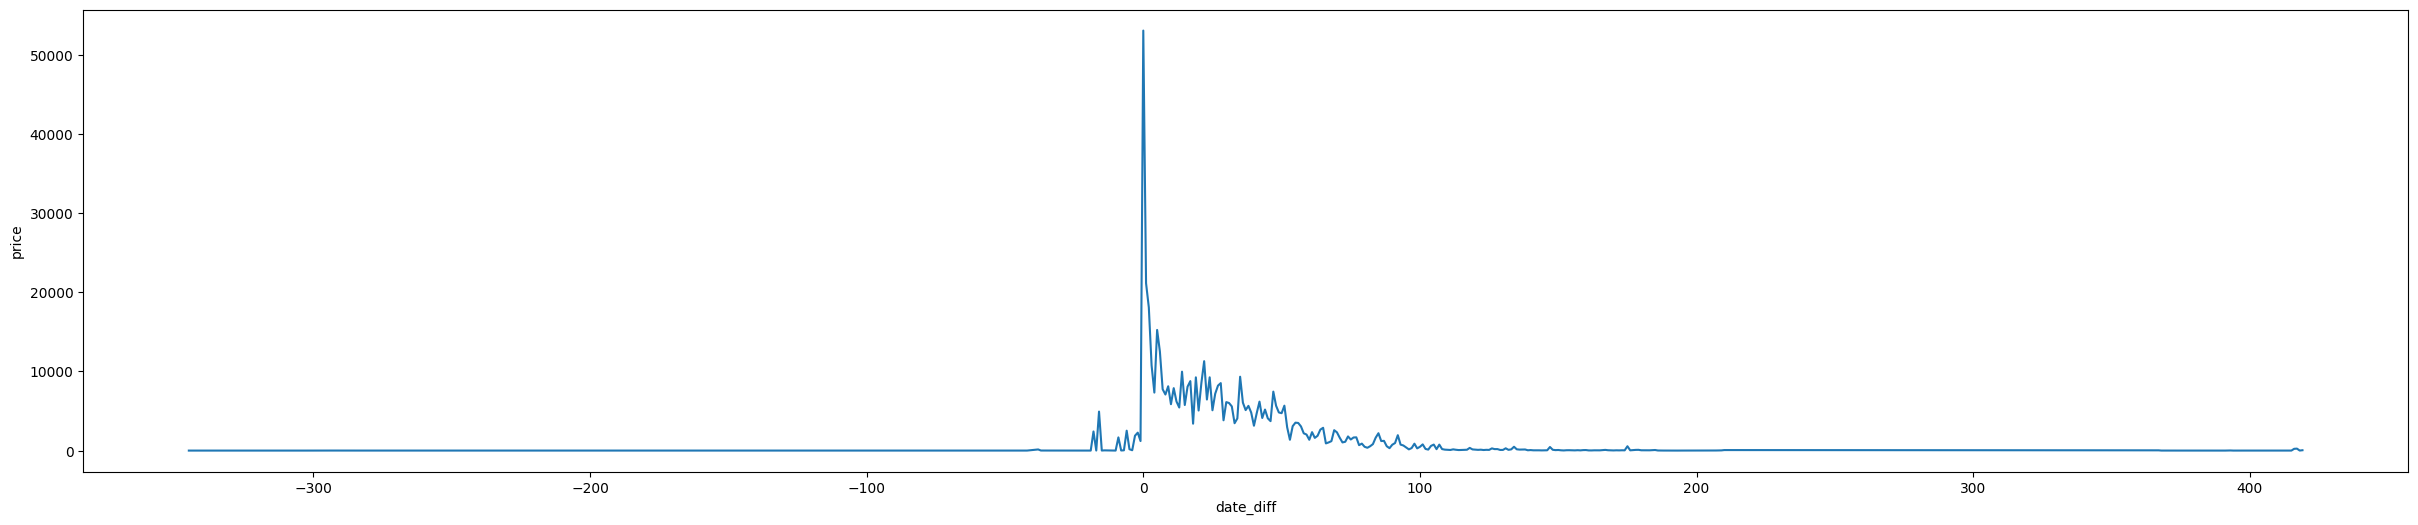

In [68]:
from matplotlib import rcParams

rcParams['figure.figsize']=30,6

sns.lineplot(x = cthall_second.groupby('date_diff').count().index , y= cthall_second.groupby('date_diff').count()['price'] )

# -100~100 까지만 따로확인해보자

In [69]:
cthall_second_cut = cthall_second[ (cthall_second['date_diff'] >= -100) & (cthall_second['date_diff'] <= 100) ]

<Axes: xlabel='date_diff', ylabel='price'>

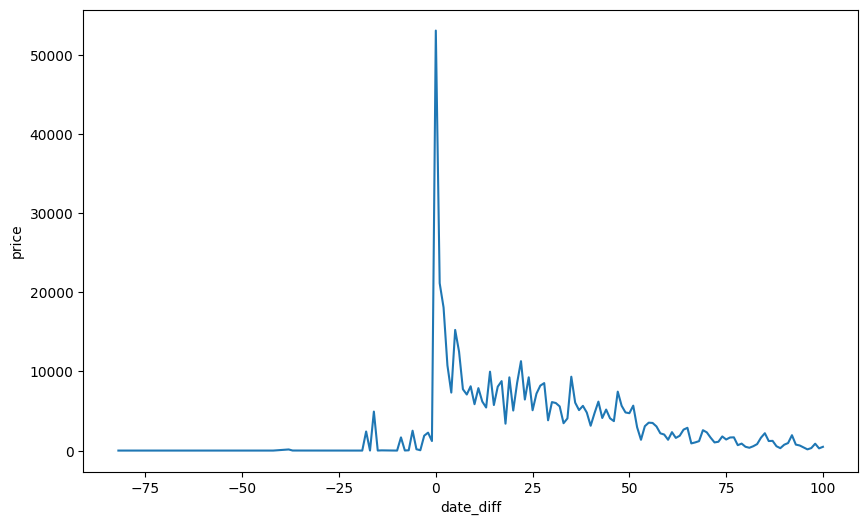

In [71]:
rcParams['figure.figsize']=10,6
sns.lineplot(x = cthall_second_cut.groupby('date_diff').count().index , y= cthall_second_cut.groupby('date_diff').count()['price'] )

<Axes: >

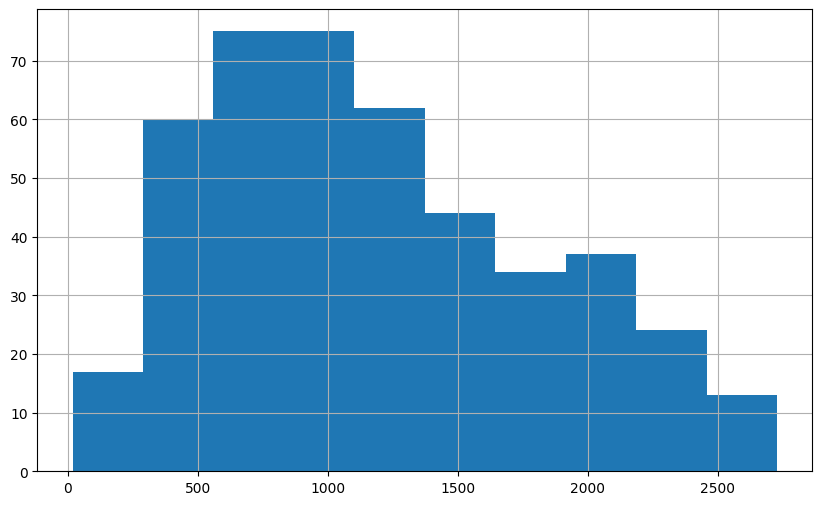

In [97]:
cthall_second.groupby(['performance_code','play_date']).count()['price'].hist()

In [124]:
cthall_second_pf = cthall_second.groupby(['performance_code','play_date'],as_index=False).count()
cthall_second_pf = cthall_second_pf[ ['performance_code','play_date','price'] ]
cthall_second_pf = cthall_second_pf.rename(columns={'price':'count_customer'})
cthall_second_pf

,performance_code,play_date,count_customer
0,3,20211024,761
1,7,20210625,791
2,30,20191023,2207
3,40,20190828,1814
4,44,20191108,1964
...,...,...,...
436,2835,20230629,1496
437,2836,20230609,1560
438,2932,20191225,69
439,2935,20210731,696


In [127]:
cthall_second_merged = pd.merge( left = cthall_second, right = cthall_second_pf, how='left', on=['performance_code','play_date'] , sort=True )
cthall_second_merged 

,play_date,performance_code,genre,running_time,time,date_diff,price,ori_price,covid_sep,covid_sep_season,count_customer
0,20211024,3,클래식,100,evening,5.0,48000,60000.000000,4.0,1,761
1,20211024,3,클래식,100,evening,26.0,96000,120000.000000,0.0,0,761
2,20211024,3,클래식,100,evening,17.0,42000,60000.000000,0.0,0,761
3,20211024,3,클래식,100,evening,27.0,42000,60000.000000,0.0,0,761
4,20211024,3,클래식,100,evening,16.0,0,0.000000,0.0,0,761
...,...,...,...,...,...,...,...,...,...,...,...
521928,20230607,2938,독주,85,afternoon,67.0,160000,145454.545455,0.0,0,1766
521929,20230607,2938,독주,85,evening,99.0,160000,145454.545455,0.0,0,1766
521930,20230607,2938,독주,85,afternoon,118.0,0,0.000000,0.0,0,1766
521931,20230607,2938,독주,85,morning,117.0,152000,160000.000000,0.0,0,1766


In [138]:
cthall_second_merged[ (cthall_second_merged['count_customer']>=2000) & (cthall_second_merged['date_diff']>=0) ].groupby(['performance_code','play_date'],as_index=False).mean('date_diff')

,performance_code,play_date,running_time,date_diff,price,ori_price,covid_sep,covid_sep_season,count_customer
0,30,20191023,75.0,43.385591,0.000000,0.000000,0.0,0.0,2207.0
1,60,20191031,90.0,9.504482,304.780876,363.093082,0.0,0.0,2008.0
2,68,20190601,150.0,33.886026,14394.449950,18455.266240,0.0,0.0,2018.0
3,137,20220911,100.0,-2.007156,0.000000,0.000000,0.0,0.0,2236.0
4,145,20221110,110.0,22.515413,172753.399819,175762.947507,0.0,0.0,2206.0
...,...,...,...,...,...,...,...,...,...
60,2803,20220608,110.0,28.589618,63492.164545,87236.666370,0.0,0.0,2042.0
61,2822,20230701,120.0,21.293148,27123.122023,30211.023215,0.0,0.0,2729.0
62,2824,20230608,120.0,11.229384,26121.697358,30579.993406,0.0,0.0,2498.0
63,2825,20230613,120.0,17.100848,24445.783133,27851.131203,0.0,0.0,2241.0


In [143]:
cthall_third = cthall_second_merged[ (cthall_second_merged['count_customer']>=2000) & (cthall_second_merged['date_diff']>=0) ].groupby(['performance_code','play_date'],as_index=False).mean('date_diff')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '30'),
  Text(1, 0, '60'),
  Text(2, 0, '68'),
  Text(3, 0, '145'),
  Text(4, 0, '229'),
  Text(5, 0, '230'),
  Text(6, 0, '234'),
  Text(7, 0, '275'),
  Text(8, 0, '512'),
  Text(9, 0, '547'),
  Text(10, 0, '579'),
  Text(11, 0, '834'),
  Text(12, 0, '849'),
  Text(13, 0, '960'),
  Text(14, 0, '963'),
  Text(15, 0, '989'),
  Text(16, 0, '1182'),
  Text(17, 0, '1209'),
  Text(18, 0, '1215'),
  Text(19, 0, '1243'),
  Text(20, 0, '1276'),
  Text(21, 0, '1277'),
  Text(22, 0, '1293'),
  Text(23, 0, '1470'),
  Text(24, 0, '1488'),
  Text(25, 0, '1496'),
  Text(26, 0, '1497'),
  Text(27, 0, '1498'),
  Text(28, 0, '1499'),
  Text(29, 0, '1503'),
  Text(30, 0, '1534'),
  Text(31, 0, '1535'),
  Text(32, 0, '1565

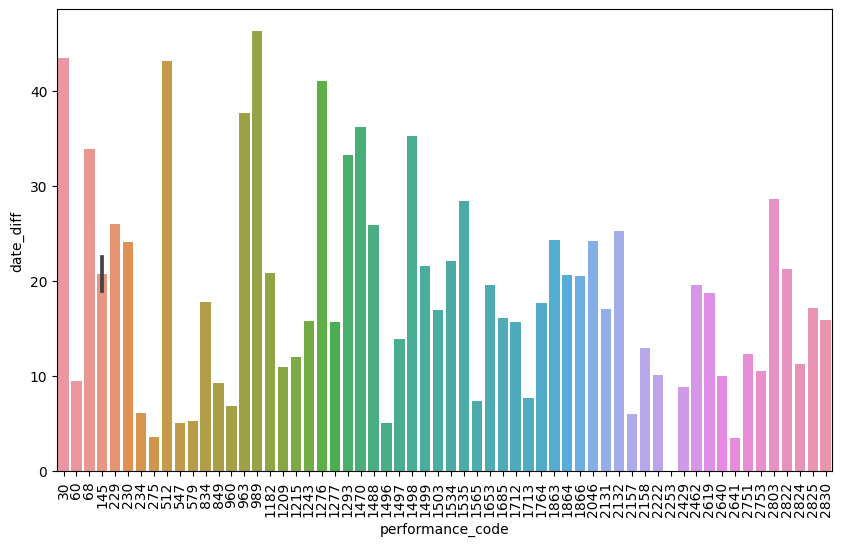

In [144]:
sns.barplot(x= cthall_third['performance_code'] , \
             y= cthall_third['date_diff'] )
plt.xticks(rotation= 90)

In [131]:
cthall_count_ct = cthall_second_merged.groupby(['performance_code','play_date'], as_index=False).apply(lambda x:x)
cthall_count_ct

play_date  performance_code genre  running_time       time  \
0   0        20211024                 3   클래식           100    evening   
    1        20211024                 3   클래식           100    evening   
    2        20211024                 3   클래식           100    evening   
    3        20211024                 3   클래식           100    evening   
    4        20211024                 3   클래식           100    evening   
...               ...               ...   ...           ...        ...   
440 521928   20230607              2938    독주            85  afternoon   
    521929   20230607              2938    독주            85    evening   
    521930   20230607              2938    독주            85  afternoon   
    521931   20230607              2938    독주            85    morning   
    521932   20230607              2938    독주            85  afternoon   

            date_diff   price      ori_price  covid_sep  covid_sep_season  \
0   0             5.0   48000   60000.000000        4.0                 1   
    1            26.0   96000  120000.000000        0.0                 0   
    2            17.0   42000   60000.000000        0.0                 0   
    3            27.0   42000   60000.000000        0.0                 0   
    4            16.0       0       0.000000        0.0                 0   
...               ...     ...            ...        ...               ...   
440 521928       67.0  160000  145454.545455        0.0                 0   
    521929       99.0  160000  145454.545455        0.0                 0   
    521930      118.0       0       0.000000        0.0                 0   
    521931      117.0  152000  160000.000000        0.0                 0   
    521932      118.0       0       0.000000        0.0                 0   

            count_customer  
0   0                  761  
    1                  761  
    2                  761  
    3                  761  
    4                  761  
...                    ...  
440 521928            1766  
    521929            1766  
    521930            1766  
    521931            1766  
    521932            1766  

[521933 rows x 11 columns]

In [132]:
cthall_count_ct[ cthall_count_ct['count_customer']>=2000 ].groupby('performance_code')

play_date  performance_code genre  running_time       time  \
2   1552     20191023                30   교향곡            75  afternoon   
    1553     20191023                30   교향곡            75    morning   
    1554     20191023                30   교향곡            75  afternoon   
    1555     20191023                30   교향곡            75  afternoon   
    1556     20191023                30   교향곡            75    morning   
...               ...               ...   ...           ...        ...   
431 509879   20230624              2830   교향곡           120    morning   
    509880   20230624              2830   교향곡           120    morning   
    509881   20230624              2830   교향곡           120    morning   
    509882   20230624              2830   교향곡           120  afternoon   
    509883   20230624              2830   교향곡           120    morning   

            date_diff  price     ori_price  covid_sep  covid_sep_season  \
2   1552         48.0      0      0.000000        0.0                 0   
    1553         20.0      0      0.000000        0.0                 0   
    1554         48.0      0      0.000000        0.0                 0   
    1555         48.0      0      0.000000        0.0                 0   
    1556         20.0      0      0.000000        0.0                 0   
...               ...    ...           ...        ...               ...   
431 509879       45.0  27000  30000.000000        0.0                 0   
    509880       21.0      0      0.000000        0.0                 0   
    509881       14.0      0      0.000000        0.0                 0   
    509882        7.0  50000  45454.545455        0.0                 0   
    509883        3.0  45000  50000.000000        0.0                 0   

            count_customer  
2   1552              2207  
    1553              2207  
    1554              2207  
    1555              2207  
    1556              2207  
...                    ...  
431 509879            2661  
    509880            2661  
    509881            2661  
    509882            2661  
    509883            2661  

[146935 rows x 11 columns]

<Axes: xlabel='performance_code', ylabel='price'>

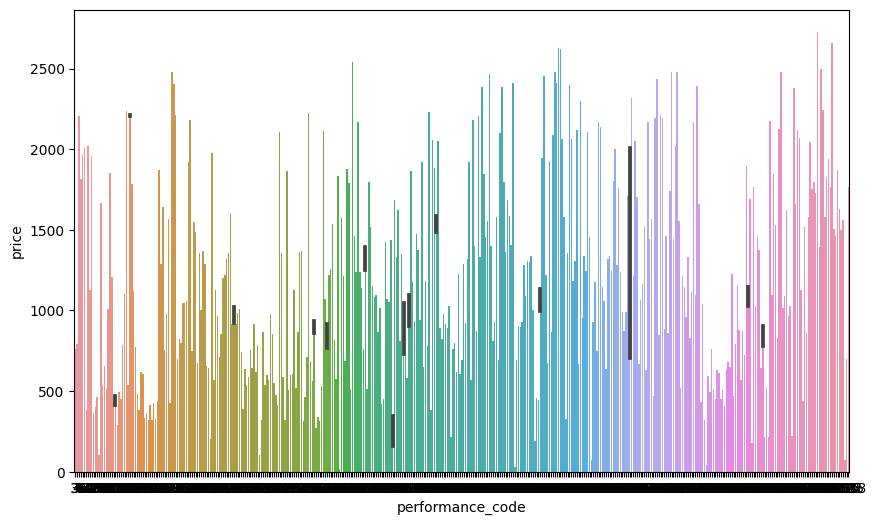

In [118]:
sns.barplot(x= cthall_second_pf['performance_code'] , \
             y= cthall_second_pf['price'] )

In [73]:
cthall_second[ cthall_second['covid_sep_season'] == 0].groupby('performance_code').count().mean()['price']
#corona 시즌이 아닐 때 좌석예매 count 평균

1227.6631299734747

In [75]:
cthall_second[ cthall_second['covid_sep_season'] != 0].groupby('performance_code').count().mean()['price']
#corona 시즌일 때 좌석예매 count 평균

615.6666666666666

<Axes: xlabel='performance_code', ylabel='price'>

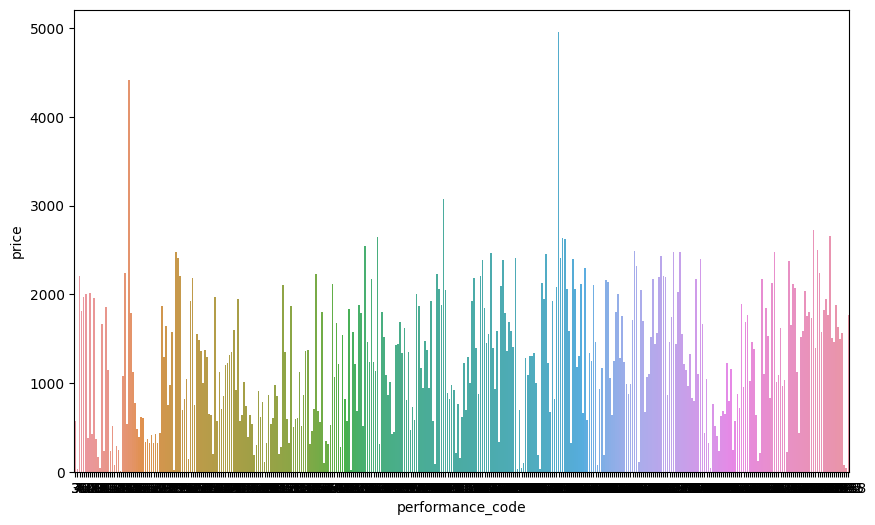

In [77]:
sns.barplot(x= cthall_second[ cthall_second['covid_sep_season'] == 0].groupby('performance_code').count().index , \
             y= cthall_second[ cthall_second['covid_sep_season'] == 0].groupby('performance_code').count()['price'] )

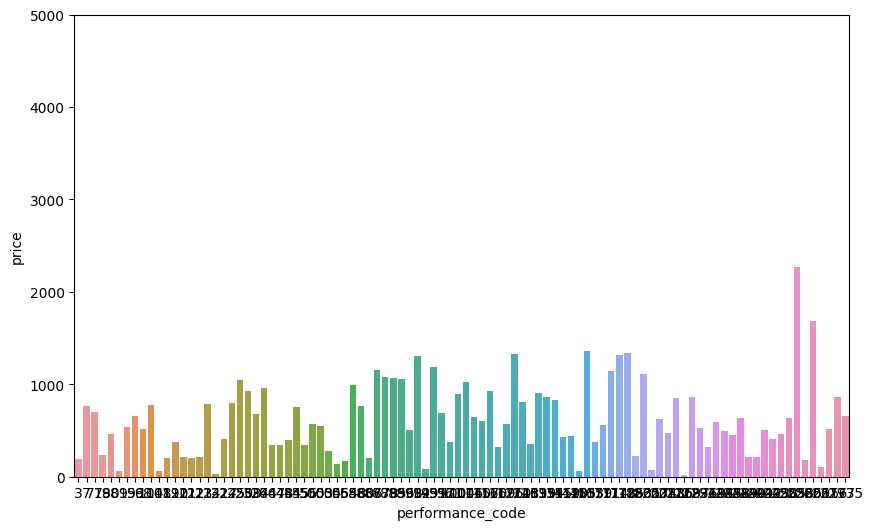

In [80]:
sns.barplot(x= cthall_second[ cthall_second['covid_sep_season'] != 0].groupby('performance_code').count().index , \
             y= cthall_second[ cthall_second['covid_sep_season'] != 0].groupby('performance_code').count()['price'] )
plt.ylim([0, 5000])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 15), constrained_layout=True)
